In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Model/archive.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

Mounted at /content/drive/


In [3]:
#Creating generator
train_ds = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [17]:
#Creating model
model = Sequential()

model.add(Conv2D(16,kernel_size = (3,3),strides = 1,padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Conv2D(32,kernel_size = (3,3),strides = 1,padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),padding = 'valid'))

model.add(Flatten())

model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=625,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=lr_schedule),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [18]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 3)

In [19]:
history = model.fit(train_ds,epochs = 20,validation_data = val_ds,callbacks = [es])

Epoch 1/20
625/625 [==============================] - 57s 85ms/step - loss: 0.8523 - accuracy: 0.5666 - val_loss: 0.6440 - val_accuracy: 0.6336
Epoch 2/20
625/625 [==============================] - 55s 87ms/step - loss: 0.6195 - accuracy: 0.6349 - val_loss: 0.5999 - val_accuracy: 0.6762
Epoch 3/20
625/625 [==============================] - 50s 80ms/step - loss: 0.5475 - accuracy: 0.6911 - val_loss: 0.5841 - val_accuracy: 0.6792
Epoch 4/20
625/625 [==============================] - 55s 87ms/step - loss: 0.5594 - accuracy: 0.6805 - val_loss: 0.5830 - val_accuracy: 0.7238
Epoch 5/20
625/625 [==============================] - 52s 82ms/step - loss: 0.4621 - accuracy: 0.7387 - val_loss: 0.5556 - val_accuracy: 0.7562
Epoch 6/20
625/625 [==============================] - 52s 83ms/step - loss: 0.4066 - accuracy: 0.7682 - val_loss: 0.5252 - val_accuracy: 0.7512
Epoch 7/20
625/625 [==============================] - 51s 81ms/step - loss: 0.3532 - accuracy: 0.7924 - val_loss: 0.5825 - val_accuracy:

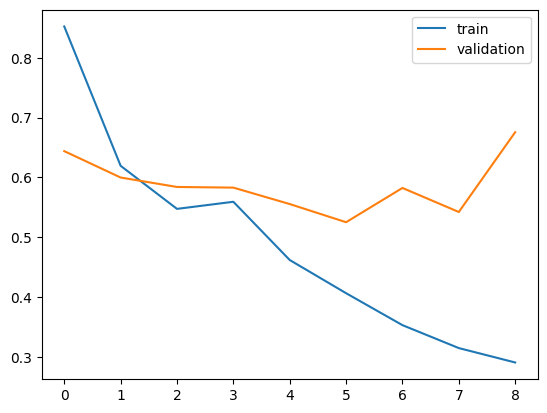

In [20]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'validation')
plt.legend()

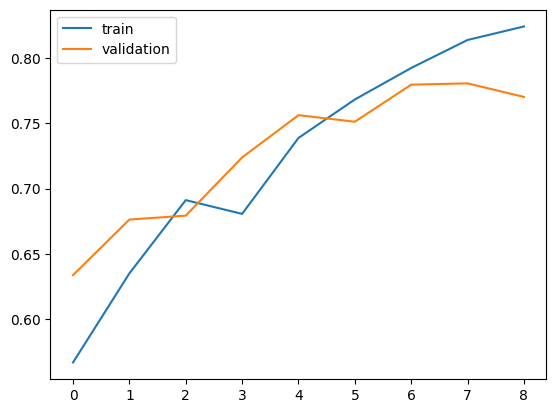

In [21]:
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'validation')
plt.legend()

In [22]:
import pickle
pickle.dump(model,open('model.pkl','wb'))